In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') #그래프 스타일 
sns.set(font_scale=2.5)

import missingno as msno #널데이터 쉽게 보여주는 라이브러리

#ignore waringings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#이 노트북에 바로바로 보기위해

In [2]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [3]:
df_train.head() # 데이터 확인  위에서 부터 몇개 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe() # 각 항목별 간단한 통계 정보

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.shape #차원을 알려줌

(891, 12)

In [6]:
df_train.columns #각 카테고리를 보여줌

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
for col in df_train.columns: # 널 데이터가 얼마나 분포하는지 알려줌, shape는 차원을 의미
    msg = 'column: {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value : 0.00%
column:   Survived	 Percent of NaN value : 0.00%
column:     Pclass	 Percent of NaN value : 0.00%
column:       Name	 Percent of NaN value : 0.00%
column:        Sex	 Percent of NaN value : 0.00%
column:        Age	 Percent of NaN value : 19.87%
column:      SibSp	 Percent of NaN value : 0.00%
column:      Parch	 Percent of NaN value : 0.00%
column:     Ticket	 Percent of NaN value : 0.00%
column:       Fare	 Percent of NaN value : 0.00%
column:      Cabin	 Percent of NaN value : 77.10%
column:   Embarked	 Percent of NaN value : 0.22%


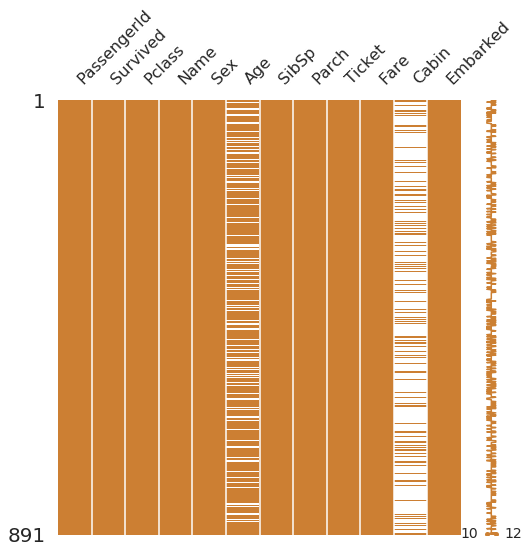

In [8]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5 ,0.2)) #빈칸이 널값을 의미

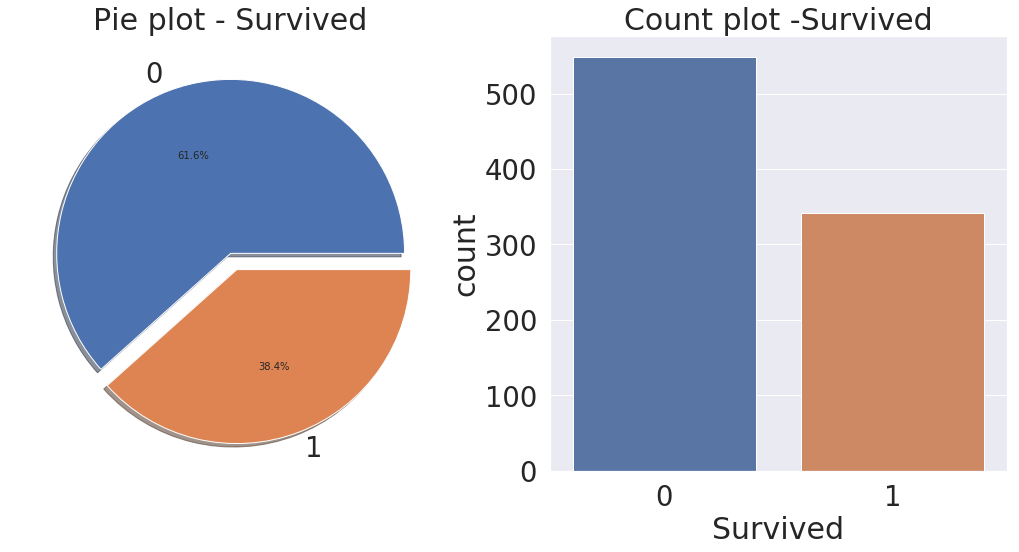

In [9]:
f, ax = plt.subplots(1,2, figsize=(18,8)) # 도화지를 준비하는 과정 1행 2열 로 된

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax = ax[1])
ax[1].set_title('Count plot -Survived')

plt.show()

**2.1Pclass**

In [10]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # 클래스 별로 어떻게 분포하는지

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum() # True,false 더함

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


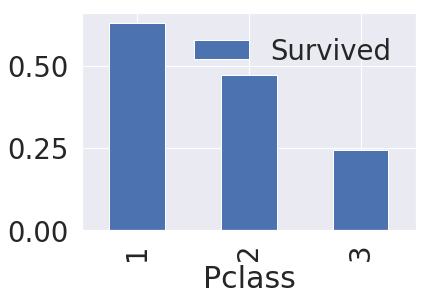

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

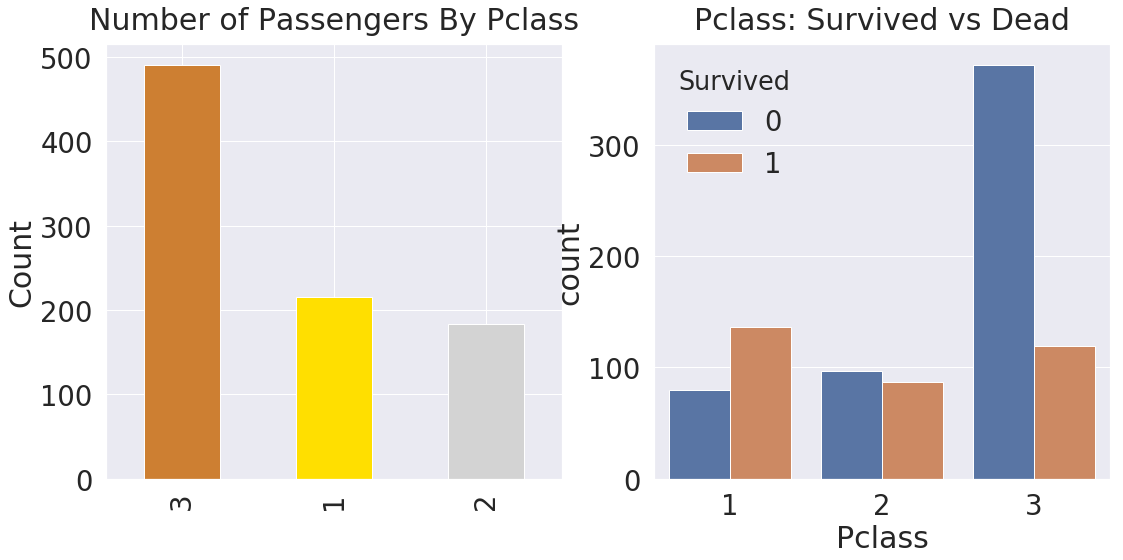

In [14]:
y_position =1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


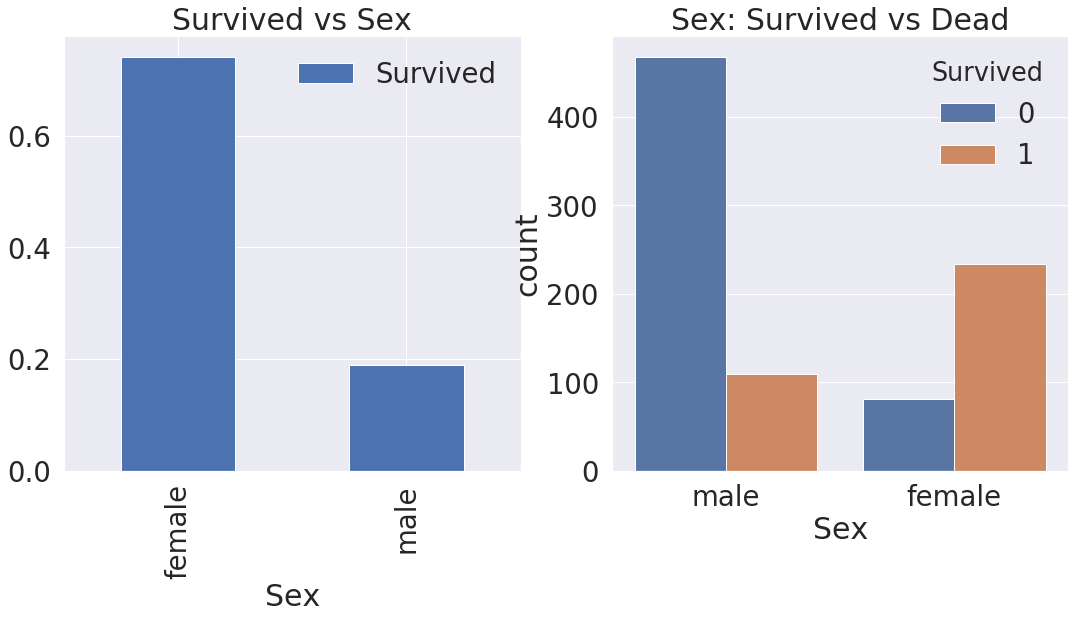

In [15]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [16]:
df_train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.2 Both Sex and Pclass

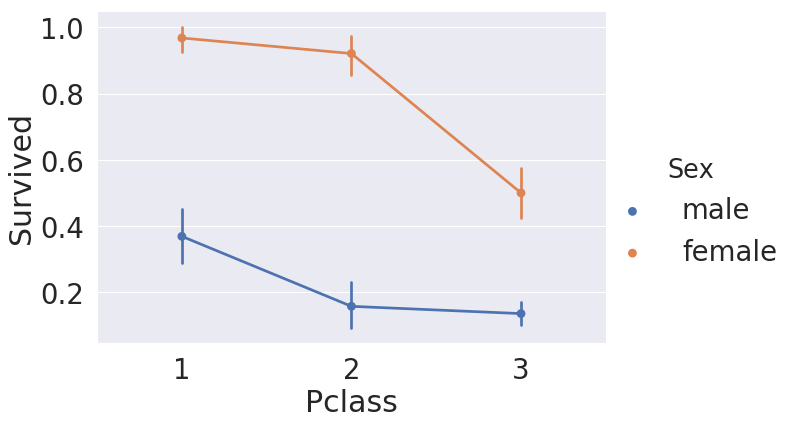

In [18]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

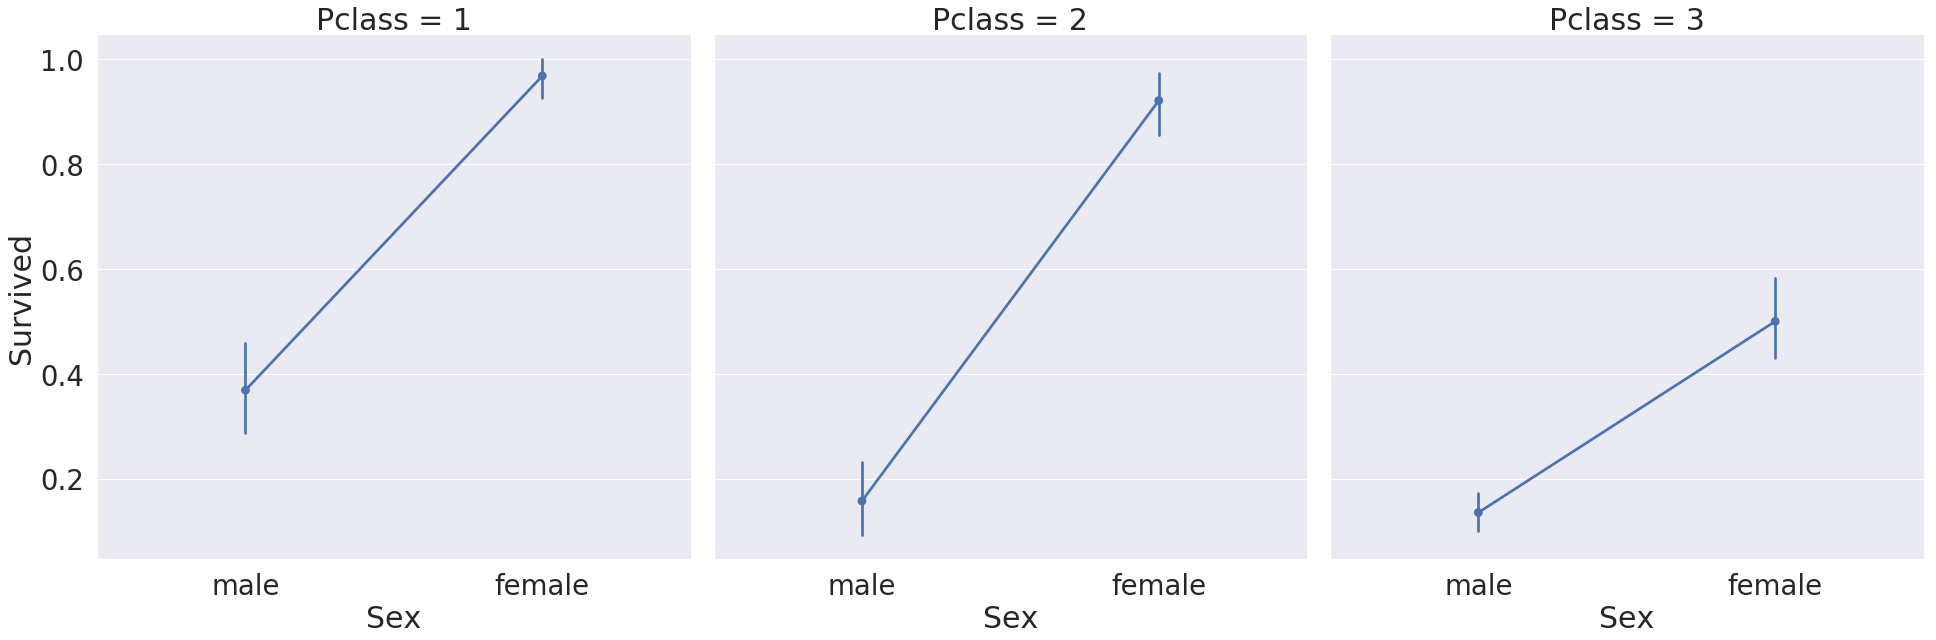

In [19]:
sns.factorplot(x='Sex',y='Survived', col= 'Pclass', data = df_train, satureation=.5,size=9,aspect=1) #에러바가 크면 믿을만하지 않다

**Age**

In [20]:
print('가장나이많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

가장나이많은 탑승객: 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


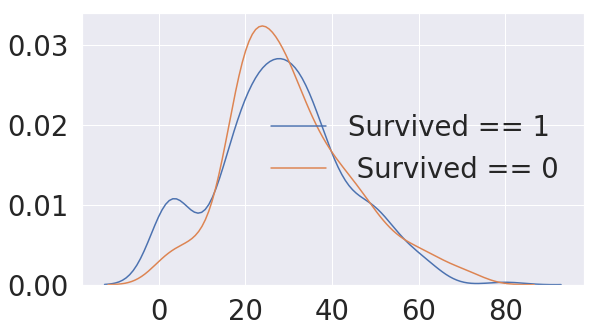

In [21]:
fig, ax = plt.subplots(1,1 ,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', ' Survived == 0'])
plt.show()

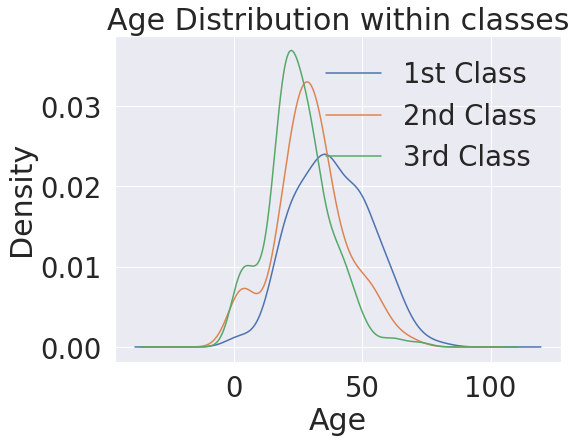

In [22]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class','3rd Class'])

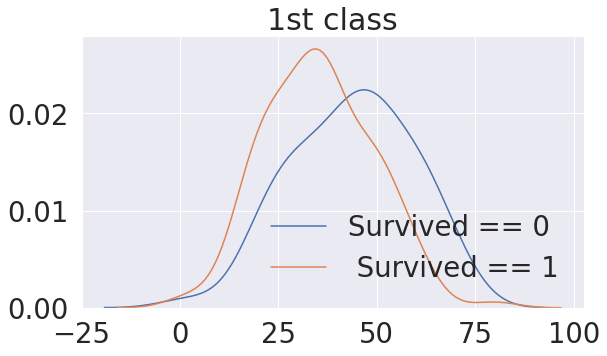

In [23]:
fig, ax = plt.subplots(1,1 ,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] ==0 ) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] ==1 ) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', ' Survived == 1'])
plt.title('1st class')
plt.show()

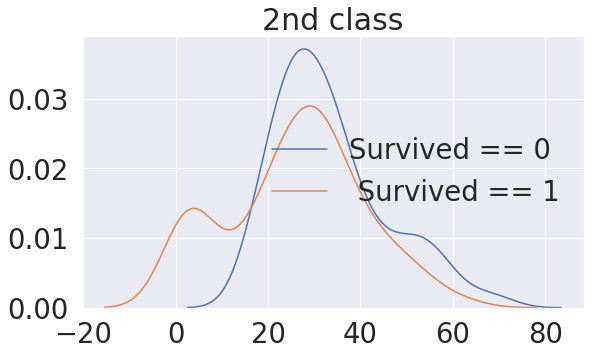

In [24]:
fig, ax = plt.subplots(1,1 ,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] ==0 ) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] ==1 ) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 0', ' Survived == 1'])
plt.title('2nd class')
plt.show()

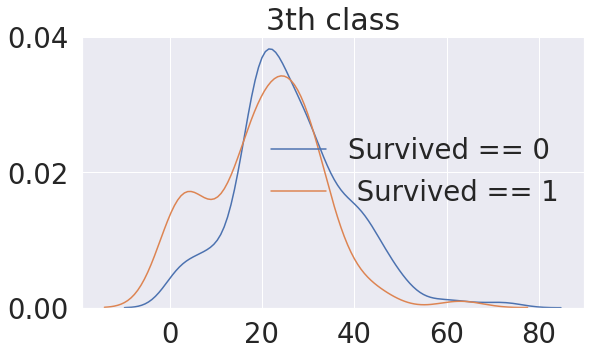

In [25]:
fig, ax = plt.subplots(1,1 ,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] ==0 ) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] ==1 ) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 0', ' Survived == 1'])
plt.title('3th class')
plt.show()

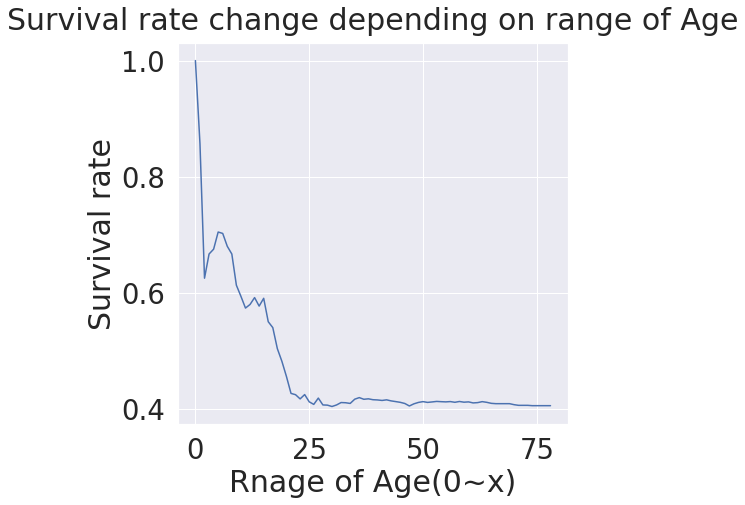

In [26]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()/len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Rnage of Age(0~x)')
plt.show()
#즉 나이가 어릴수록 생존확률이 높다.

**Pclass, Sex, Age**

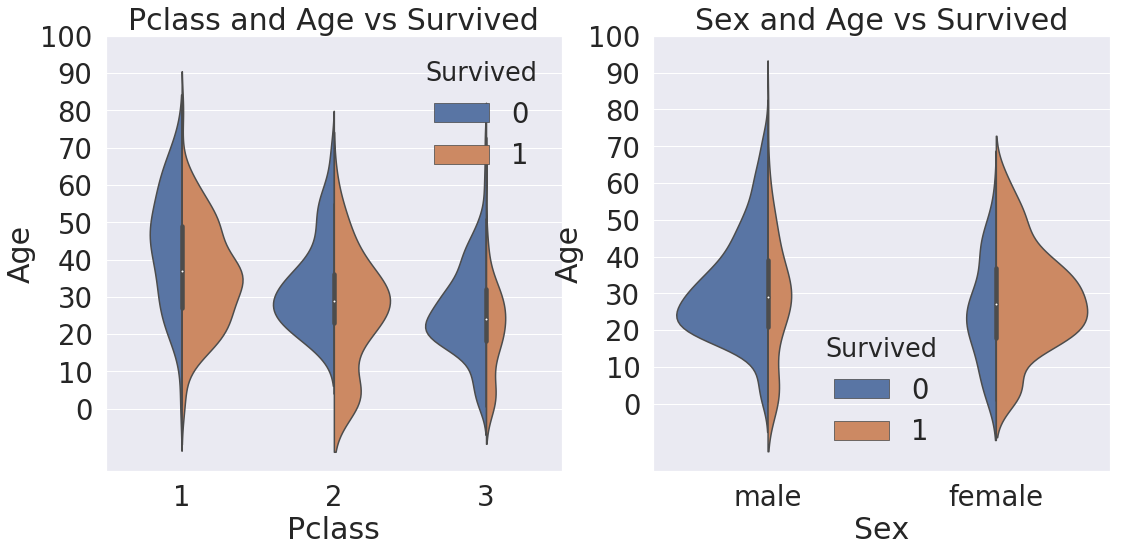

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue = "Survived",data=df_train, scale = 'count', split =True, ax=ax[0]) #area 옵션은 같은 널이로 (정보가 날아감)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue = "Survived", data=df_train, scale= 'count', split = True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


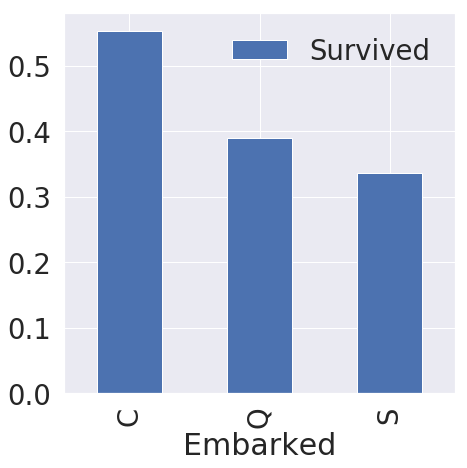

In [28]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

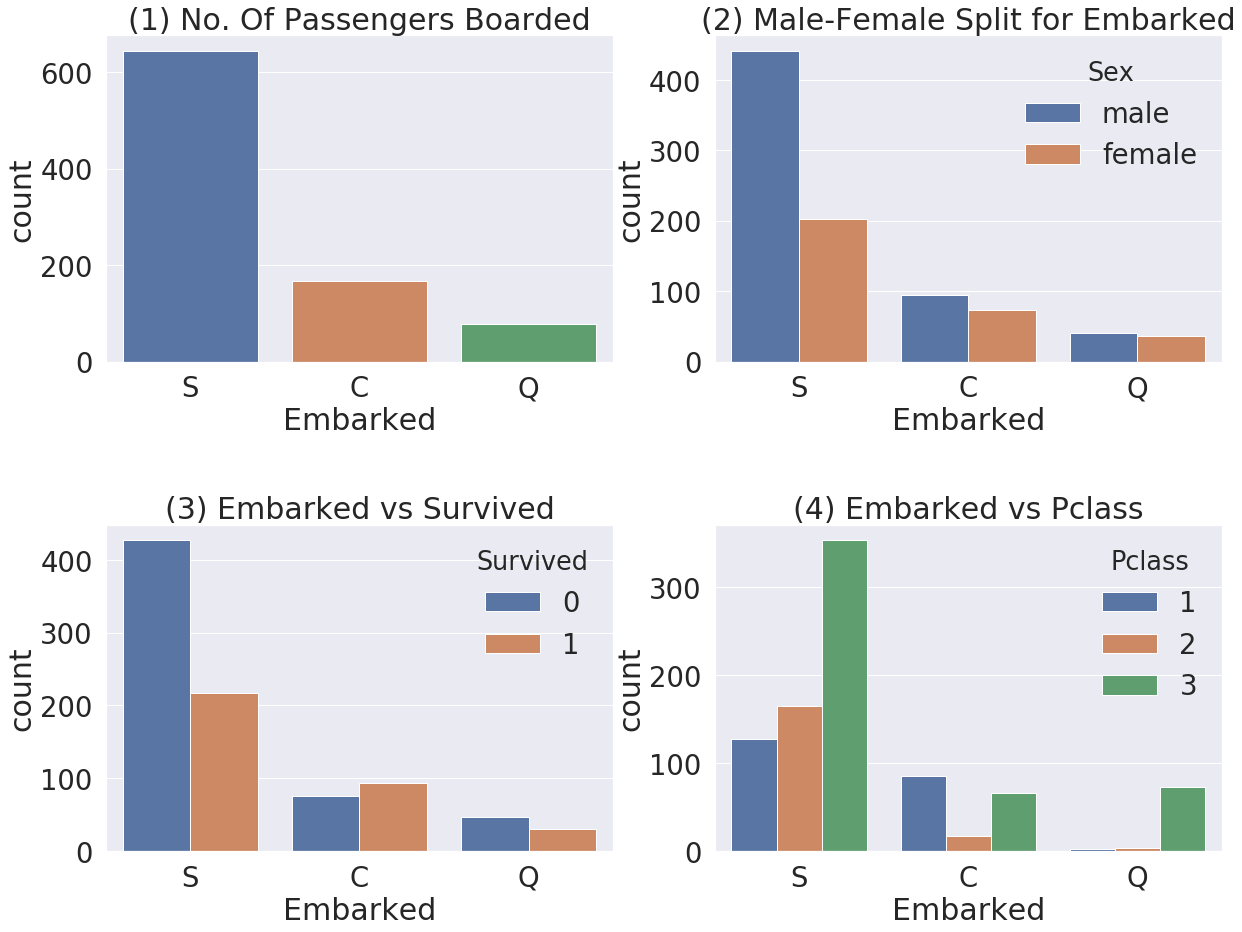

In [29]:
f, ax = plt.subplots(2,2, figsize =(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0]) #S에서 많이 사람이 탄 것을 알수 있음
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue ='Sex', data=df_train, ax =ax[0,1]) #C와 q에서 여성이 많이 탐을 알수 있음
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue ='Survived', data=df_train, ax=ax[1,0]) #생존율이 cq에서 높은걸 알 수 있음
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1]) # c항구에는 여성이 많고 P1클레스가 많아 생존율이 높다
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5) #좌우 간격 상하 간격을 맞춰줌
plt.show()


**Family-SibSp + Parch**

In [30]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #시리즈끼리 더하고 빼는것이 가능함
df_test['FamilySize']= df_test['SibSp'] + df_test['Parch'] + 1

In [31]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


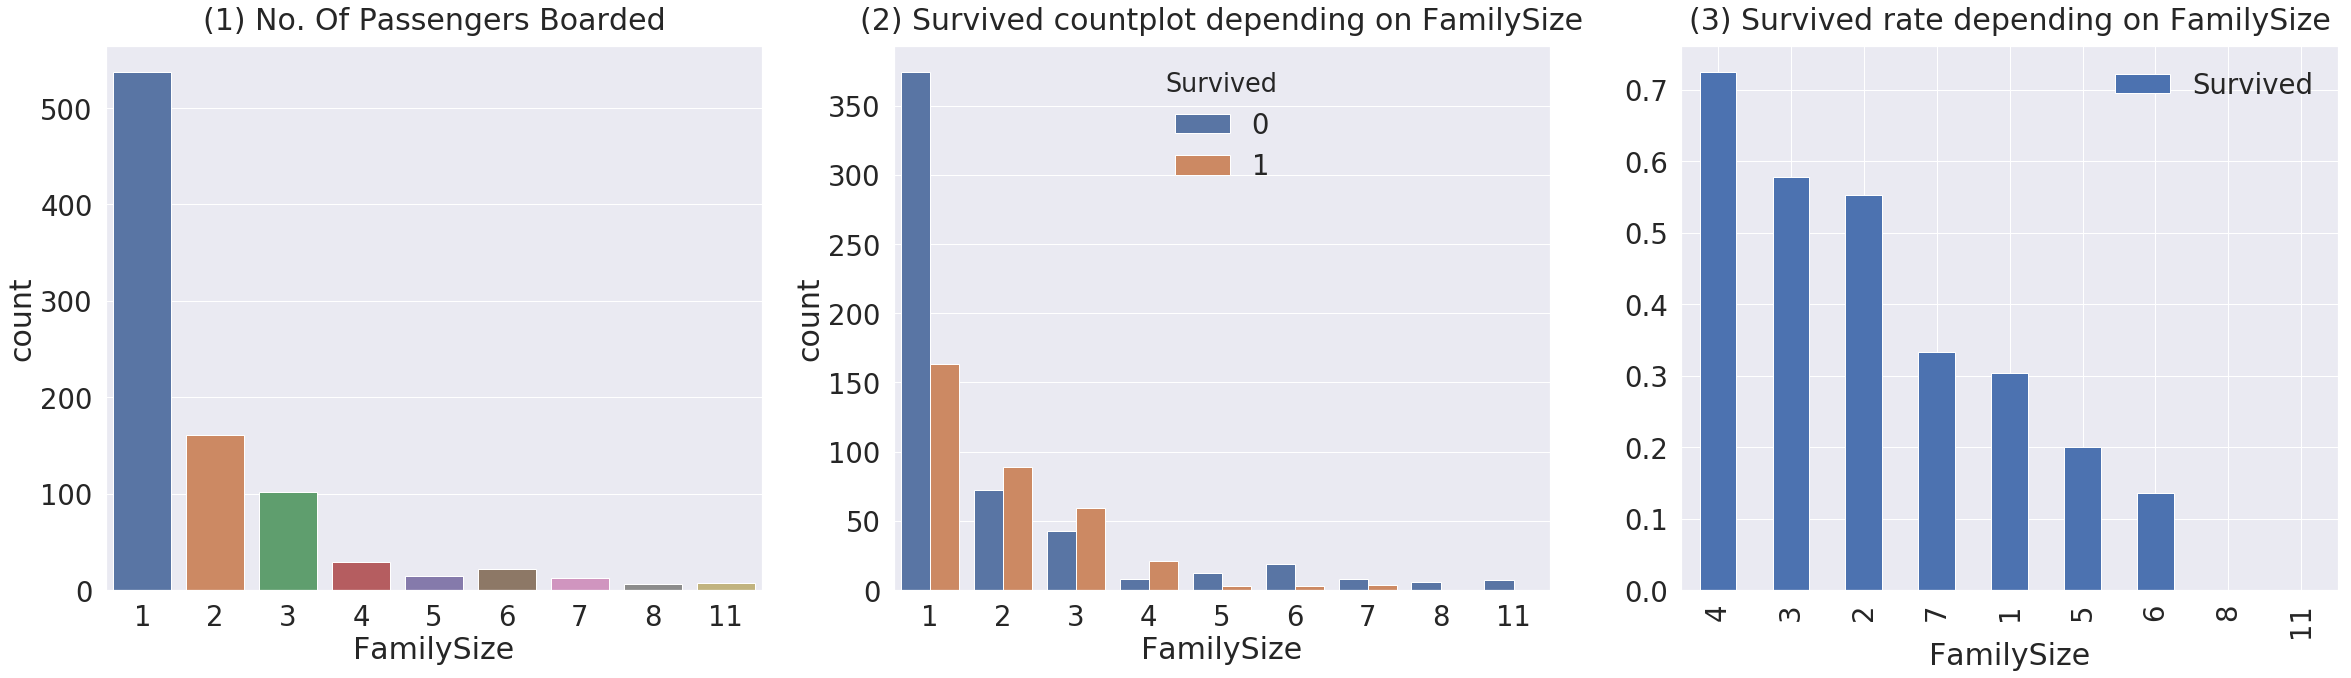

In [32]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Fare

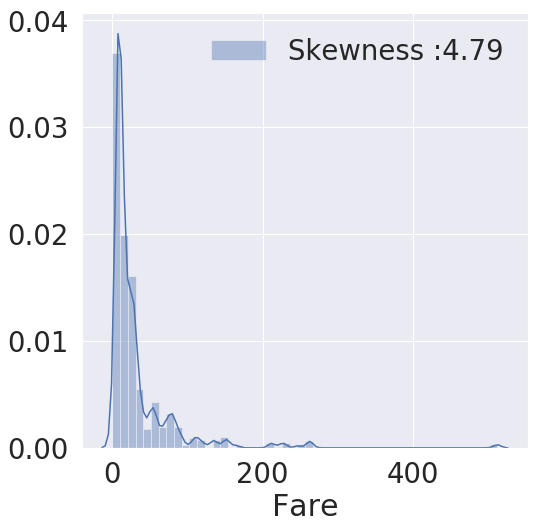

In [33]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color= 'b', label='Skewness :{:.2f}'.format(df_train['Fare'].skew()), ax=ax) #시리즈 히스토그램을 그려주는,, 얼마나 쏠려있는지(비대칭인지)
g= g.legend(loc='best')

In [34]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0 )

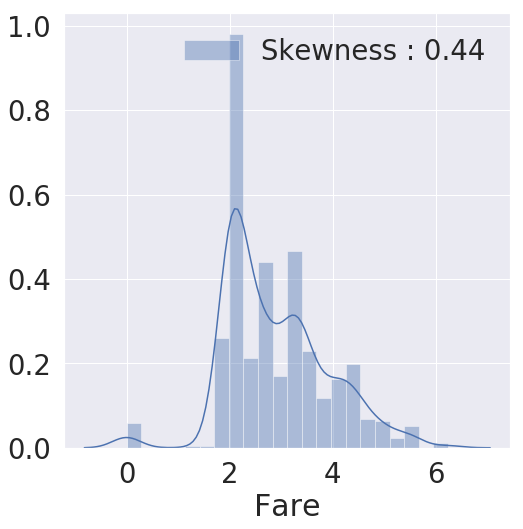

In [35]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label= 'Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax =ax)
g = g.legend(loc='best')

In [36]:
df_train['Ticket'].value_counts() #어려워서 뻄

CA. 2343             7
347082               7
1601                 7
3101295              6
347088               6
CA 2144              6
382652               5
S.O.C. 14879         5
349909               4
347077               4
17421                4
2666                 4
113781               4
4133                 4
LINE                 4
PC 17757             4
19950                4
113760               4
W./C. 6608           4
29106                3
PC 17582             3
13502                3
24160                3
345773               3
347742               3
363291               3
110152               3
230080               3
248727               3
110413               3
                    ..
PC 17596             1
SC/PARIS 2133        1
113514               1
113787               1
7545                 1
36967                1
345770               1
233639               1
324669               1
349243               1
330909               1
350025               1
234604     

In [37]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [38]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [39]:
df_train['Initial'].replace(['Mlle', 'Mme','Ms','Dr', 'Major','Lady','Countess','Jonkheer', 'Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss', 'Miss', 'Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)
df_test['Initial'].replace(['Mlle', 'Mme','Ms','Dr', 'Major','Lady','Countess','Jonkheer', 'Col','Rev','Capt','Sir','Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [40]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


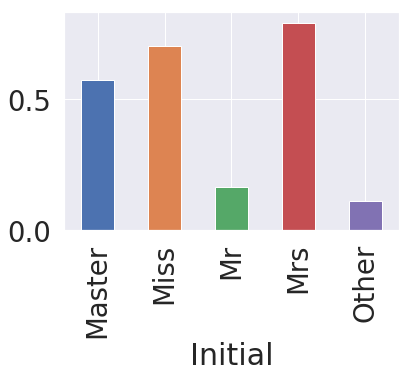

In [41]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [42]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [43]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] =33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] =5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] =22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] =46

df_test.loc[(df_test.Age.isnull())& (df_test.Initial == 'Mr'), 'Age'] =33
df_test.loc[(df_test.Age.isnull())& (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull())& (df_test.Initial == 'Master'), 'Age']= 5
df_test.loc[(df_test.Age.isnull())& (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())& (df_test.Initial == 'Other'), 'Age'] = 46

In [44]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has 2 Null values


In [45]:
df_train['Embarked'].fillna('S', inplace=True)


In [46]:
df_train['Age_cat'] = 0 
df_train.loc[df_train['Age'] <10 , 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] <20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] <30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] <40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] <50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] <60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] <70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] =7

df_test['Age_cat'] = 0 
df_test.loc[df_test['Age'] <10 , 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] <20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] <30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] <40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] <50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] <60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] <70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] =7



In [47]:
def category_age(x):
    if x< 10:
        return 0
    elif x< 20 :
        return 1
    elif x< 30 :
        return 2
    elif x< 40 :
        return 3
    elif x< 50 :
        return 4
    elif x< 60 :
        return 5
    elif x< 70:
        return 6
    else:
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [48]:
print('1번 방법  , 2번방법 둘다 같은 결과이면 참이어야 함 ->>>', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법  , 2번방법 둘다 같은 결과이면 참이어야 함 ->>> True


In [49]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [50]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr':2, 'Mrs':3 , 'Other':4 })
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss' :1, 'Mr':2, 'Mrs':3 , 'Other':4})

In [51]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [52]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
df_train['Embarked']=df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [54]:
df_train['Embarked'].isnull().any()

False

In [55]:
df_train['Sex']= df_train['Sex'].map({'female': 0 , 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female': 0 , 'male': 1})

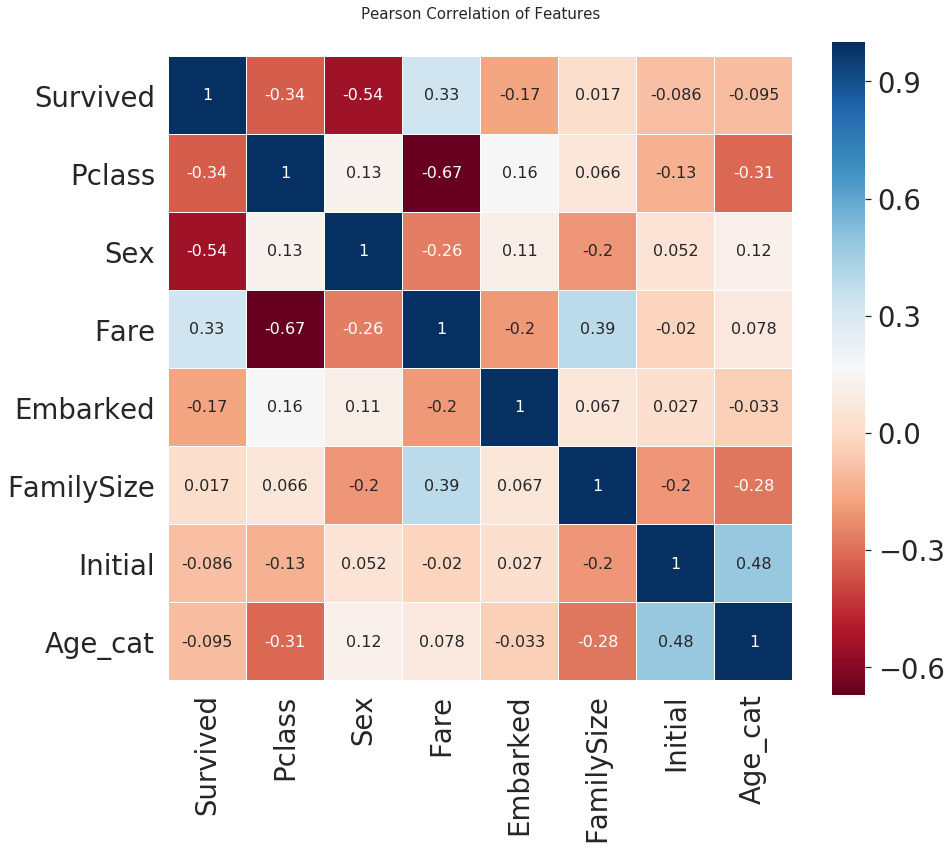

In [56]:

heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05 , size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1 , vmax=1.0 , square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16 })

del heatmap_data


In [57]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [58]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [59]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix = 'Embarked')

In [60]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis =1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis =1, inplace=True)

In [61]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [62]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [64]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [65]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train, target_label, test_size =0.3 , random_state =2018)

In [66]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vid)

In [67]:
print('총 {}명중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vid.shape[0], 100*metrics.accuracy_score(prediction, y_vid)))

총 268명중 82.84% 정확도로 생존을 맞춤


In [68]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

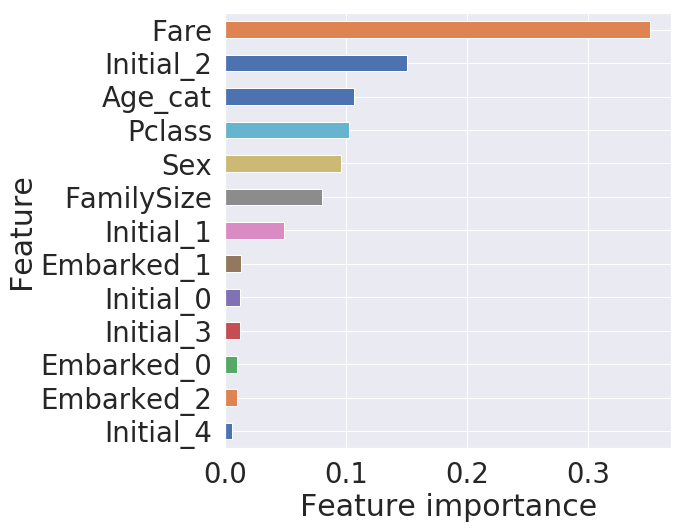

In [69]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [70]:
submission = pd.read_csv('../input/gender_submission.csv')

In [71]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [73]:
submission.to_csv('./my_first_submission.csv',index=False)